# <u>Partie 1.2:</u> Visualisation des données

<b><u>Auteurs</u> :</b> Eytan Levy, Guillaume Surleau et Manitas Bahri  
<b><u>Date</u> :</b> Mars 2023

In [1]:
# Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Définit le chemin du répertoire parent
import sys
sys.path.append("../")

# Custom packages
from py_scripts import pre_processing as pp
from py_scripts.utils import *


In [2]:
# Pour afficher toutes les collones et lignes de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [3]:
# Charge la base de donnée
DATASET: pd.DataFrame
DATASET, _ = pp.load_preproc_dataset(ratio_test=0, rescaled=False, split_X_y=False) # type: ignore


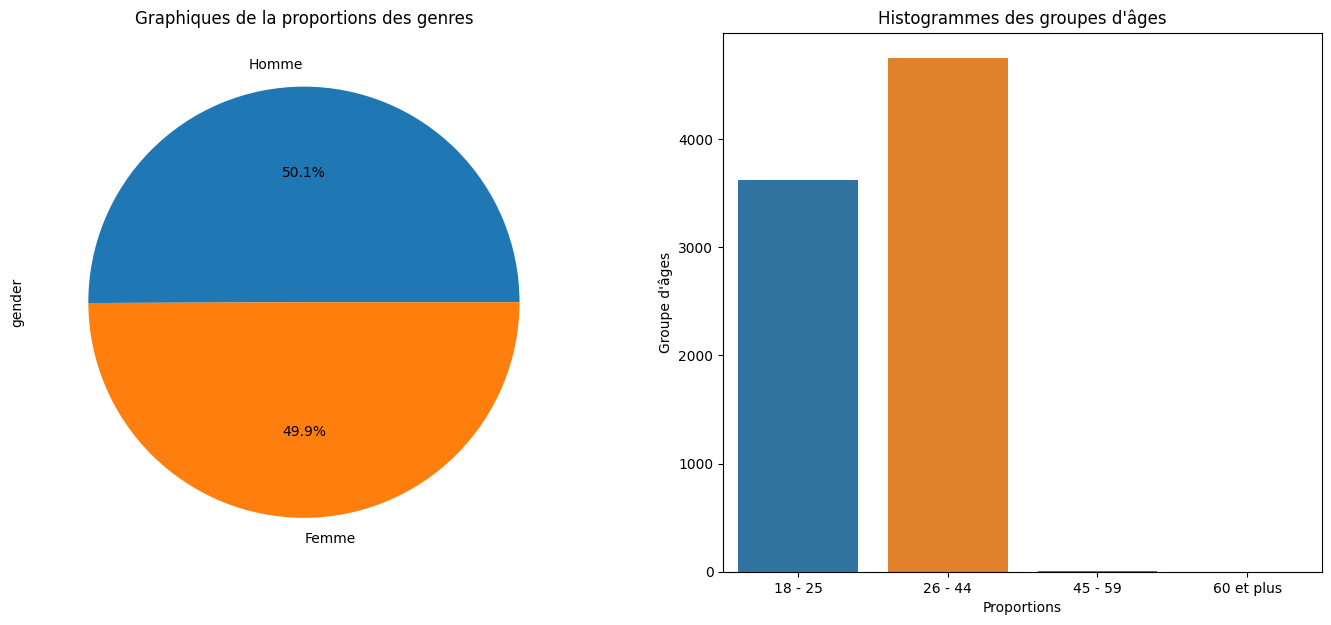

In [4]:
plt.figure(figsize=(17, 7))
args = {"kind": "pie", "autopct": "%.1f%%"}

# Proportion des genres.
plt.subplot(121)
plt.title("Graphiques de la proportions des genres")
lbl_gender = ["Homme", "Femme"]
DATASET["gender"].value_counts().plot(**args, labels=lbl_gender)

# Proportion des âges.
g1 = DATASET[(DATASET["age"] >= 18) & (DATASET["age"] <= 25)]
g2 = DATASET[(DATASET["age"] >= 26) & (DATASET["age"] <= 44)]
g3 = DATASET[(DATASET["age"] >= 45) & (DATASET["age"] <= 59)]
g4 = DATASET[(DATASET["age"] >= 60)]

groups_age = {"18 - 25": len(g1), "26 - 44": len(g2),
              "45 - 59": len(g3), "60 et plus": len(g4)}

plt.subplot(122)
sns.barplot(x=list(groups_age.keys()), y=list(groups_age.values()))
plt.xlabel("Proportions")
plt.ylabel("Groupe d'âges")
plt.title("Histogrammes des groupes d'âges")

plt.show()


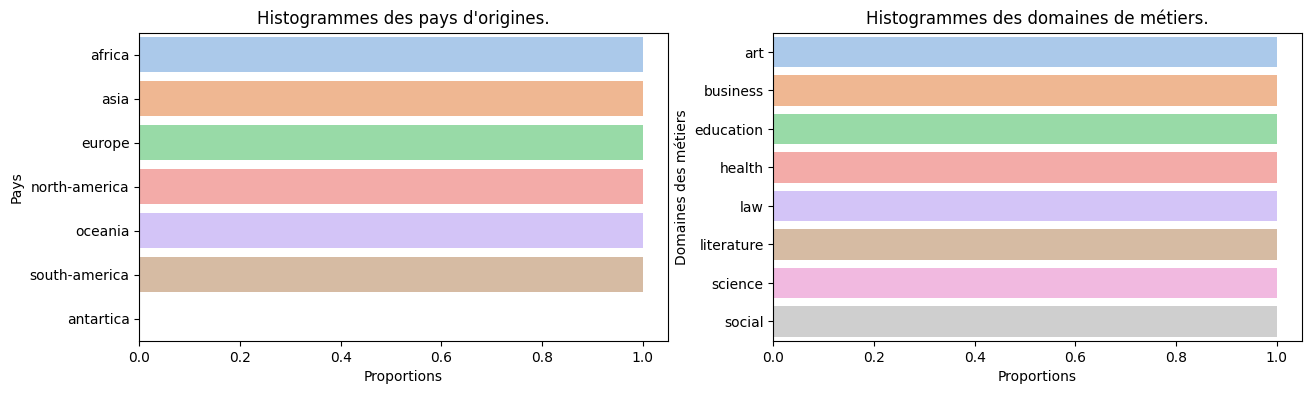

In [5]:
lbl_from, val_from = count_multiple_columns(DATASET, "from_")
lbl_career, val_career = count_multiple_columns(DATASET, "career_")

plt.figure(figsize=(15, 4))

# Graphique des pays
plt.subplot(121)
sns.barplot(x=lbl_from, y=val_from, palette="pastel")
plt.xlabel("Proportions")
plt.ylabel("Pays")
plt.title("Histogrammes des pays d'origines.")

# Graphique des personnes
plt.subplot(122)
sns.barplot(x=lbl_career, y=val_career, palette="pastel")
plt.xlabel("Proportions")
plt.ylabel("Domaines des métiers")
plt.title("Histogrammes des domaines de métiers.")
plt.show()


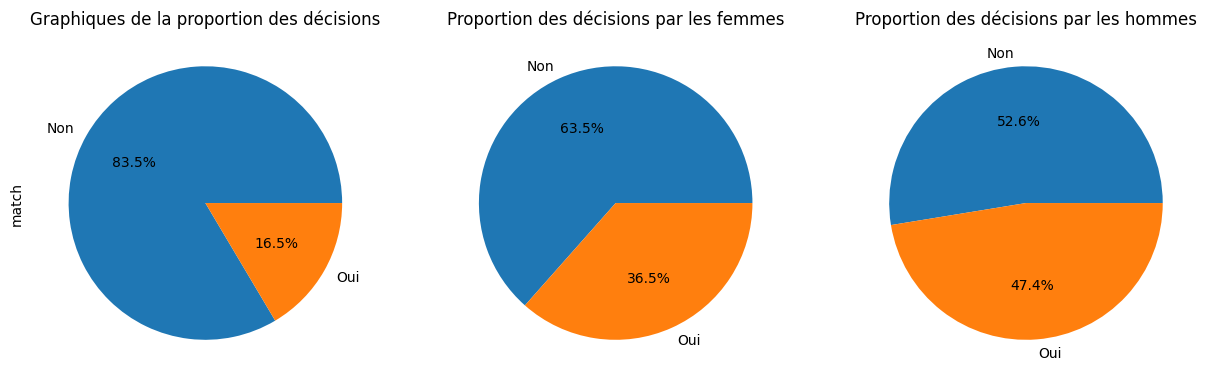

In [6]:
decision = DATASET.groupby("gender")["decision"].value_counts()
woman_decision, man_decision = decision[0], decision[1]
lbl_yesno = ["Non", "Oui"]

plt.figure(figsize=(15, 7))

# Proportion de match
plt.subplot(131)
plt.title("Graphiques de la proportion des décisions")
DATASET["match"].value_counts().plot(**args, labels=lbl_yesno)

plt.subplot(132)
plt.pie(x=woman_decision, labels=lbl_yesno, autopct="%.1f%%")
plt.title("Proportion des décisions par les femmes")

plt.subplot(133)
plt.pie(x=man_decision, labels=lbl_yesno, autopct="%.1f%%")
plt.title("Proportion des décisions par les hommes")

plt.show()


In [7]:
DATASET.drop(columns=["p_decision", "decision"], inplace=True)


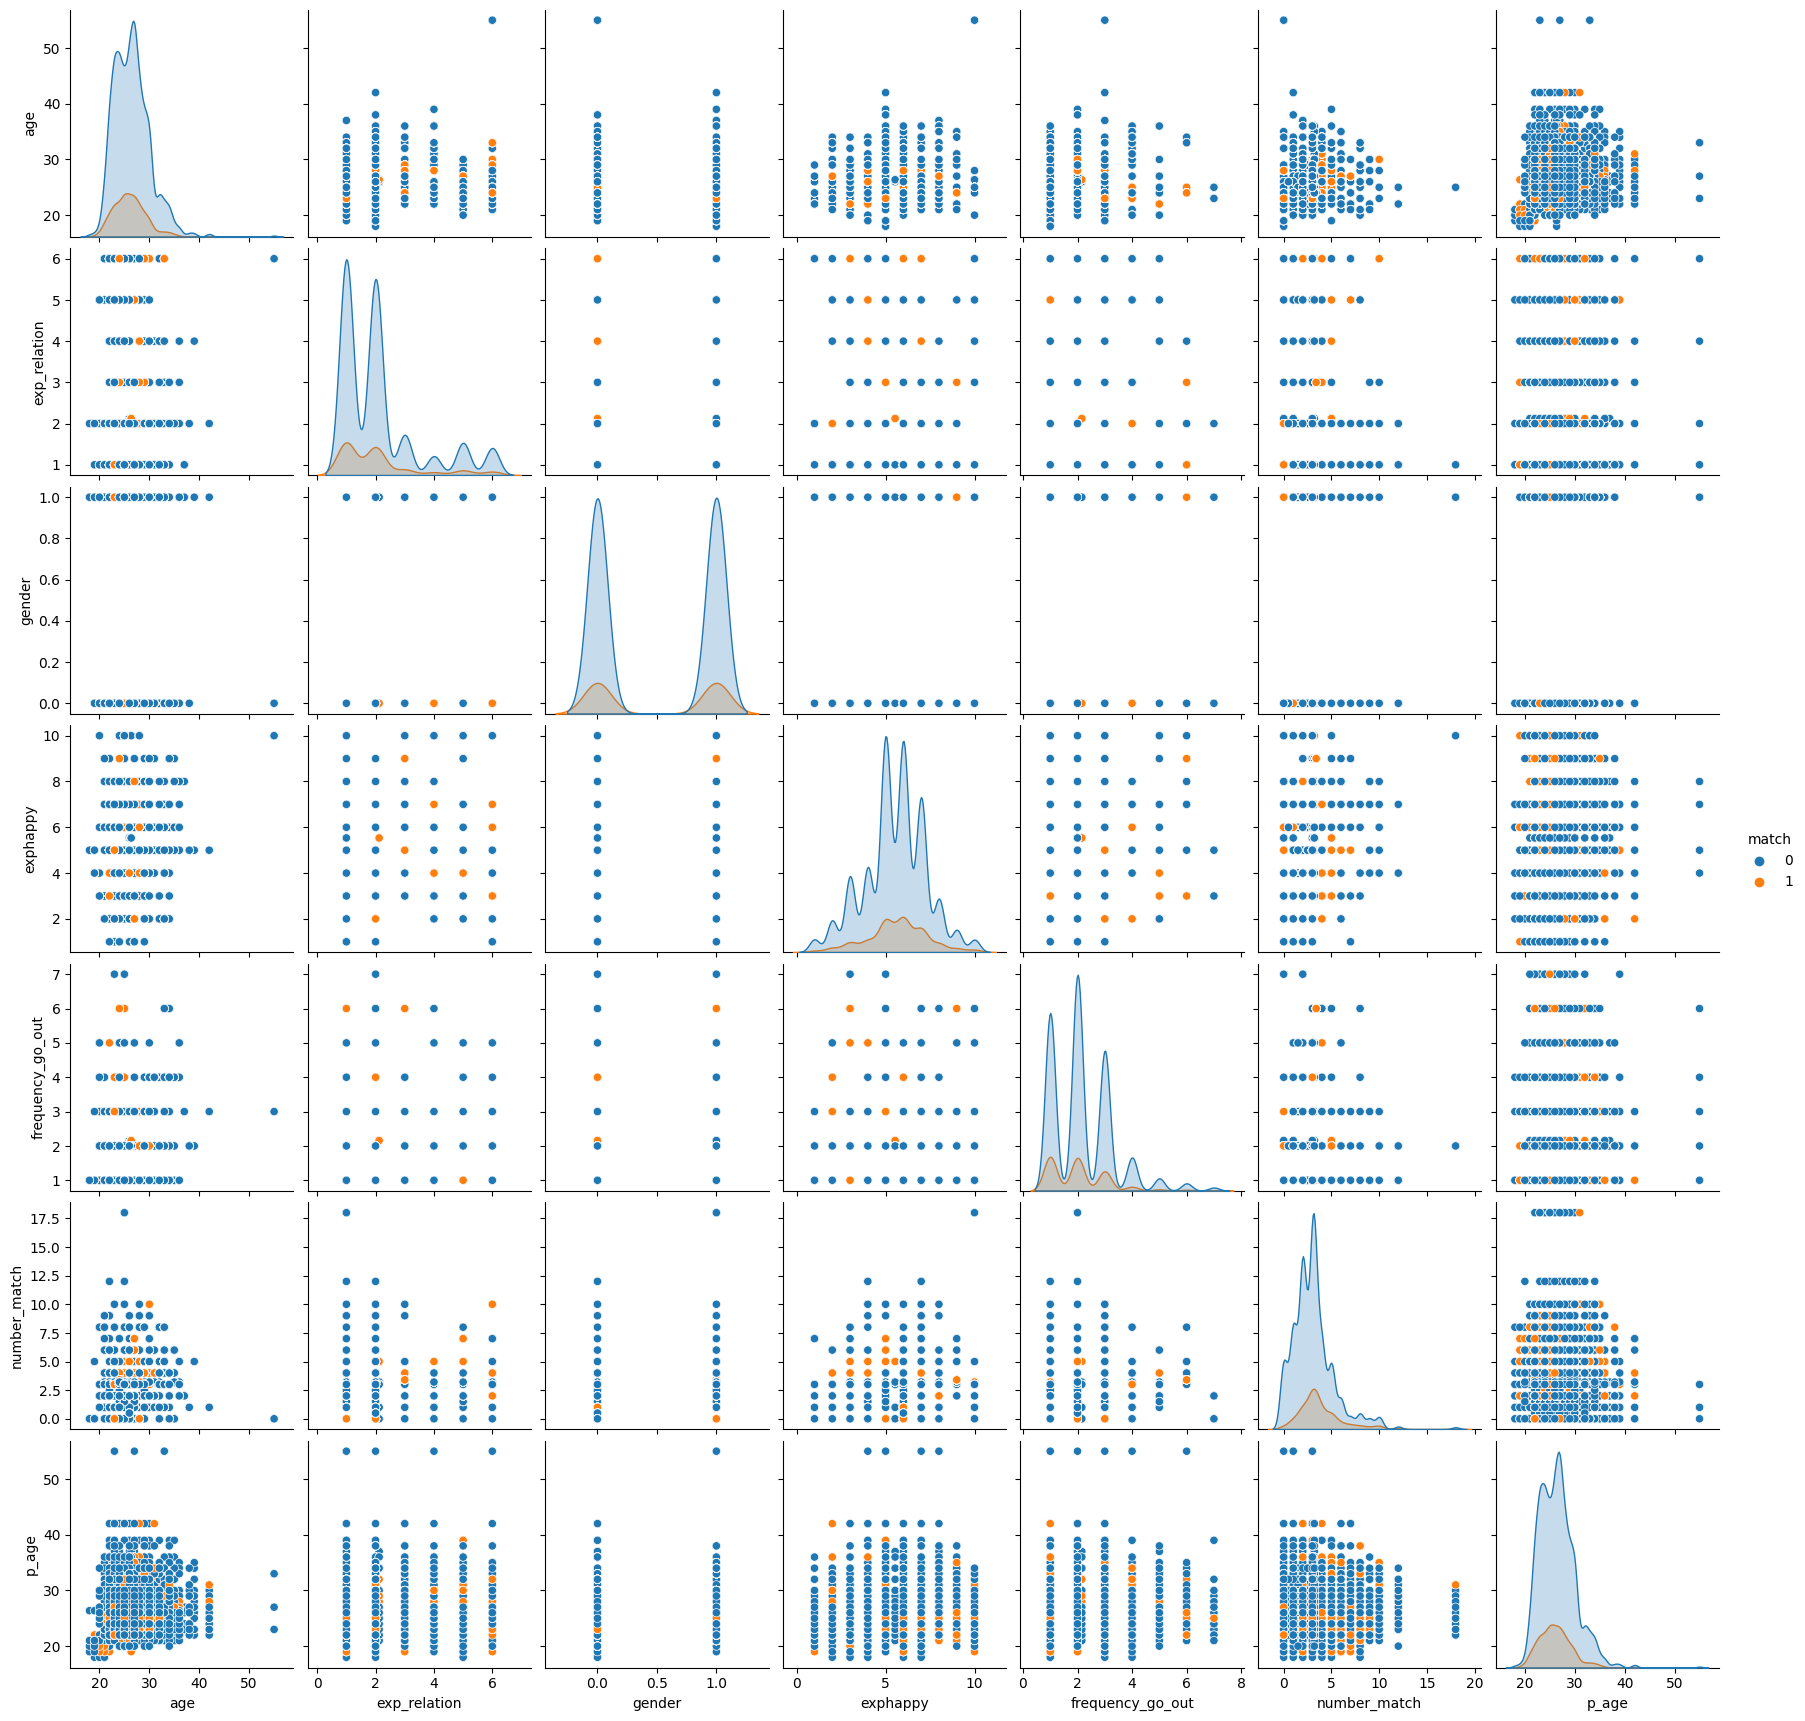

In [8]:
charact = ["age", "exp_relation", "gender", "exphappy", "frequency_go_out", "number_match", "p_age"]

sns.pairplot(DATASET, hue="match", vars=charact)
plt.show()